Decision Tree with Genetic Algorithm
---

###### By: James

# Libraries

In [1]:
from random import choice, choices, randint, randrange, random, uniform
from typing import Tuple, List
from statistics import mode

import pickle
import numpy as np
import pandas as pd
import sklearn as sk

from sklearn import tree, svm, naive_bayes ,ensemble
from sklearn.model_selection import KFold, cross_val_score

print('sklearn version:',sk.__version__)
print('numpy version:',np.__version__)
print('pandas version:', pd.__version__)

sklearn version: 0.23.2
numpy version: 1.18.5
pandas version: 1.1.3


# Contents
## 1. Introduction
## 2. Literature Review
### 2.1. Decision Tree
### 2.2. Evolutionary Algorithms
#### 2.2.1. Decision Tree with Genetic Algorithm
##### 2.2.1.1. Initial Population
##### 2.2.1.2. Fitness Evaluation
##### 2.2.1.3. Selection
##### 2.2.1.4. Crossover
##### 2.2.1.5. Mutation
##### 2.2.1.6. Stopping Criteria
### 2.3. Applications of Genetic Algorithm
## 3. Experiment
### 3.1. Dataset
### 3.2. Benchmark
### 3.3. Experimental Results and Analysis
#### 3.3.1. Model Parameters
#### 3.3.2. Result Analysis
## 4. Future Research on Method
### 4.1. Future Research
### 4.2. Future Application
## 5. Conclusion

# 1. Introduction

Decision Tree (DT) is one of the most popular and widely used classification model in machine learning, this is attributed to its simplicity, robustness and high interpretability, allowing it to resemble human reasoning process. However, decision tree employs greedy search strategy which may create 1) inability to yield global optimum solution and 2) a model that does not generalise well. Typically, pruning technique will be carried out to reduce the complexity of decision tree model, and hence, reducing overfitting of the model. In addition, it is noteworthy to mention that to achieve global optimised decision tree model, it will be a NP-hard problem which increases computational time drastically. 

In this project, Evolutionary Algorithm (EA) will be proposed to construct decision tree model. It reduces complexity of the final classifier by removal of sections of a classifier that may be based on erroneous data without reducing predictive accuracy. In this algorithm, it focuses on the criteria/features needed to induce a good decision tree classifier rather than the parameters to optimise (via pruning or impurity measure). Algorithm will be tested with dataset obtain from public UCI database and compare with standard decision tree algorithm.

The report is structured into 5 sections and the content in the subsequent sections are as follows. Literature review on decision tree algorithm and evolutionary algorithm will be discussed in depth in section 2. In section 3, dataset, benchmarking methods, experimental results and analysis will be presented. In section 4, further discussion on future of evolutionary algorithm and other potential field of applications and lastly, in section 5, conclusion will be drawn on evolutionary algorithm approach on decision tree classifier.


# 2. Literature Review

In this section, the algorithms and techniques used in the project will be discussed and further elaborated

## 2.1. Decision Tree

Decision tree is a structure build from elements called nodes and branches. Nodes can be classified into three categories, a root node, an internal node and a terminal node. Root node and internal node test an attribute/feature, with each of the branches representing one possible attribute value/outcome of the test. Terminal or leaf node assigns a class label. Thus, to classify an input x, it will traverse down the tree from root node to leaf node, to attain an output label y.

The algorithm in building decision tree classifier usually consists of two steps: growth and pruning.

In growth phase, the best attribute will be selected to represent the root node (parent node) of the decision tree and it will be split into two or more internal nodes (child node), common metrics used to determine the best attribute to split are Gini impurity and entropy. The creation of child nodes increases the homogeneity and this process will be repeated recursively, until all training instances belong in one of the terminal node (leaf node). Other common ways of stopping the growth of decision tree algorithm includes setting the maximum depth of tree, minimum number of samples required to be in a leaf nodes and minimum numbers of samples to be split in each internal node. 

Post growth phase, pruning can be carried out to reduce complexity of decision tree model, by removing decision nodes that do not affect overall accuracy. This can be done using validation data set and it helps to prevent overfitting of decision tree model.

## 2.2. Evolutionary Algorithm – Genetic Algorithm

Evolutionary Algorithms (EA) are a heuristic-based approach that is inspired by the process of natural biological evolution. Typically, evolutionary algorithm is used in solving problems that cannot be easily solved in polynomial time, such as classically NP-Hard problems, and anything else that would take far too long to exhaustively process. In this project, Genetic Algorithm (GA) will be used

In general, genetic algorithm has 4 components listed below:

1.	A population of individuals representing possible solutions for a given problem.
2.	A fitness function which evaluates the quality of individual (solution).
3.	A selection function which decides how to pick individuals from current population for the next generation.
4.	Genetic operators to carry out crossover and mutation operation which explore new regions of search space while retaining a portion of current information.

The idea genetic algorithm is a collective learning process, each individual of a population represent a possible solution for a given problem. In the first population of individuals, it is randomly initialised and through each generation, randomised process of selection, mutation and recombination are carried out. The quality of the solution is measured by fitness value of each individual, higher fitness score represents a better solution and the individual will have a higher probability of being selected for the next generation. The procedure is iteratively repeated until a stopping criterion is reached, which fittest individual representing the best solution for the problem.

### 2.2.1. Decision Tree with Genetic Algorithm

In this project, instead of using entropy measure to evolve binary decision tree for classification task, genetic algorithm will be used. It is a multi-objective evolutionary algorithm which aggregates different objectives and combine into one objective function. This eliminate the use of greedy search algorithm, as such approach does not guarantee a globally optimal decision tree. With genetic algorithm, it may escape local minima in the search space as it uses randomised search technique.

Pseudo code is given below

1: Randomly generate initial population of trees  
2: Compute the fitness value of each tree  
3: Repeat 
>4: 	Select individuals based on fitness  
>5: 	Apply crossover and mutation to selected individuals, creating new trees  
>6: 	Compute the fitness value of each new tree  
>7: 	Update the current population (new individuals replace previous individuals)  

8: until (stopping criteria)

In the subsequent subsection, it describes the detailed implementation of genetic algorithm induced decision tree classifier also known as evolutionary decision tree.

#### 2.2.1.1. Initial Population

In evolutionary decision tree classifier, the trees in the first population are randomly generated and growth of trees is dictated by maximum tree depth, defined as root to leaf node. A root node and two children form the first tree, with the algorithm deciding if the children are split or the node becomes a terminal node (leaf) with a predefined probability, *Psplit*. For a terminal node, it is assigned randomly with a class label. Node that is further expanded will have attribute and split value randomly selected. If selected attribute has *k* split values, it is replaced by *k-1* calculated thresholds.

#### 2.2.1.2. Fitness Evaluation

The objective of the classifier is to obtain the best predictive accuracy for any unseen or unlabelled data. The size of the final tree is crucial in determining the performance of model, a small tree results in underfitting issues and a complex tree results in overfitting issues.

Fitness Function (FF) will be used to balance between model complexities (size of tree) and model accuracy as define in the following equation below:

FF= f_1+α_2 f_2

f_1=1-  (Total number of correctly classified data instances in training set )/(Total number of data intances in training set)

f_2=(Current tree depth)/(Target tree depth (user defined))

Where:
f1 is the error of the model on training set
f2 is a parameter which penalises the complexity of model
α2 is the weightage of f2

Parameters α2 is a hyper-parameter of FF, it can be tune via cross validation to improve model accuracy. The model is optimised when FF is at minimum.


#### 2.2.1.3. Selection

Individuals are selected from current generation to create children for the next generation based on FF. Selection methods includes tournament selection, fitness proportionate selection, elitism and etc. Tournament selection is implemented in the proposed algorithm. In this technique, several "tournaments" are conducted among a few individuals chosen at random from the population. The winner of each tournament (the one with the best fitness) is selected for crossover. One key advantage for tournament selection algorithm is the easiness of selection pressure adjustment.

Note that each individual can be selected more than once, in which case it spread its genes to more children.

#### 2.2.1.4. Crossover

Crossover produces child by combining pairs of parents in the current population. Two individuals are chosen by selection algorithm. From both trees, a random node is selected according to randomly selected number which can take values from 1 (root node) to n (total number of tree nodes). The new individual (offspring) is thus formed by replacing the sub-tree form the first parent by the one from the second parent.

Figure below illustrates the crossover operation.
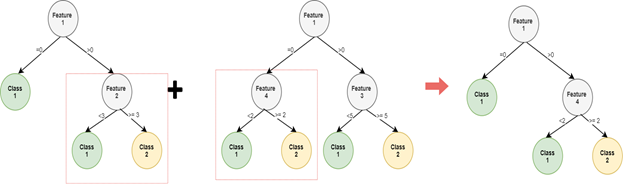

#### 2.2.1.5. Mutation

Mutation is an operator that ensure genetic diversity from one generation to another by making small random changes with a predefined probability, *Pmutation*, in individuals of population to create mutant child. Ensuring genetic diversity enables genetic algorithm to search a broader space, possibly improving the model performance. Node condition mutation is implemented in proposed algorithm which randomly changes both attribute and split value.

Figure below illustrates the mutation operation.
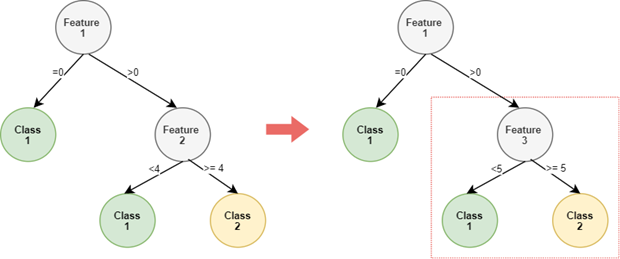

#### 2.2.1.6. Stopping Criteria

Evolutionary decision tree classifiers will stop if either of the two conditions is satisfied.
1.	Maximum number of generation reached
2.	Fitness of best individual does not improve after a fixed number of iterations.

## 2.3. Applications of Genetic Algorithm

Genetic algorithm being a population-based random search algorithm. It is widely used for optimisation problems due to some of its advantages listed below.

* Genetic algorithm has large solution space search ability, allowing it to avoid local minima
* Genetic algorithm does not require specific knowledge of task given by using fitness function
* Genetic algorithm can manage data sets with many features.
* Genetic algorithm can be easily parallelised in computer clusters.

Due to its benefits, it has many real-world application in engineering design, finance, robotics, transportation and etc. 

Below is some applications of using genetic algorithm.

* DNA Analysis − genetic algorithm has been used to determine the structure of DNA using spectrometric data of the sample.
* Economics − genetic algorithm is used to characterize various economic models like the cobweb model, game theory equilibrium resolution, asset pricing, etc.
* Parametric Design of Aircraft – genetic algorithm has been used to design aircrafts by varying the parameters and evolving better solutions.
* Scheduling applications − genetic algorithm is used to solve various scheduling problems, particularly time tabling problem.
* Traveling salesman problem and its applications – genetic algorithm has been used to solve the TSP, which is a well-known combinatorial problem using novel crossover and packing strategies.

One noteworthy application in which genetic algorithm plays a crucial role is in robotics. As the environment in which robots work change with time, it becomes difficult for programmers to code explicitly to anticipate such changes. A suitable approach is needed to lead the robot in achieving its goal and adapting to new environment. Hence, genetic algorithm is used to learn high performance knowledge structures and also making parallel search of solution space via a population of individuals (solutions). The candidate solutions represent every possible behaviour of the robot and based on the overall performance of the candidates, each could be assigned a fitness value. Genetic operators are then used to improve the behaviour of the population. The best solution (highest fitness value) will be used as the robot action.


# 3. Experiment

In this section, experimental validation of the proposed approach was carried out with real-life dataset obtained from UCI Machine Learning Repository. The experiment was set up to achieve two main objectives are:
1.	Evaluate the effectiveness of proposed model compared to decision tree algorithm.
2.	Improving performance of baseline proposed model.

## 3.1. Dataset

The dataset used is “Early Stage Diabetes Risk Prediction Dataset” obtained from UCI Machine Learning Repository. It was collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and validated by a doctor.

It contains a total of 520 data instances with 16 different features, binary class label and no missing values. The dataset is fairly balanced, with approximately 40% belonging to negative class and 60% belonging to positive class.


In [2]:
dataset_1 = 'diabetes'
dataset_1 = pd.read_csv(f'{dataset_1}.csv')
dataset_1.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [3]:
dataset_1.describe(include=['O'])

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320


In [4]:
# Check for missing values
dataset_1 = dataset_1.fillna(np.nan)
dataset_1.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [5]:
# transforming features from string into binary features
dataset_1["Gender"] = dataset_1["Gender"].map({"Male": 1, "Female":2})
dataset_1["Polyuria"] = dataset_1["Polyuria"].map({"No": 1, "Yes":2})
dataset_1["Polydipsia"] = dataset_1["Polydipsia"].map({"No": 1, "Yes":2})
dataset_1["sudden weight loss"] = dataset_1["sudden weight loss"].map({"No": 1, "Yes":2})
dataset_1["weakness"] = dataset_1["weakness"].map({"No": 1, "Yes":2})
dataset_1["Polyphagia"] = dataset_1["Polyphagia"].map({"No": 1, "Yes":2})
dataset_1["Genital thrush"] = dataset_1["Genital thrush"].map({"No": 1, "Yes":2})
dataset_1["visual blurring"] = dataset_1["visual blurring"].map({"No": 1, "Yes":2})
dataset_1["Itching"] = dataset_1["Itching"].map({"No": 1, "Yes":2})
dataset_1["Irritability"] = dataset_1["Irritability"].map({"No": 1, "Yes":2})
dataset_1["delayed healing"] = dataset_1["delayed healing"].map({"No": 1, "Yes":2})
dataset_1["partial paresis"] = dataset_1["partial paresis"].map({"No": 1, "Yes":2})
dataset_1["muscle stiffness"] = dataset_1["muscle stiffness"].map({"No": 1, "Yes":2})
dataset_1["Alopecia"] = dataset_1["Alopecia"].map({"No": 1, "Yes":2})
dataset_1["Obesity"] = dataset_1["Obesity"].map({"No": 1, "Yes":2})
dataset_1["class"] = dataset_1["class"].map({"Negative": 1, "Positive":2})

In [6]:
# transforming numerical age feature into age band and dropping age feature
dataset_1['ageband'] = dataset_1['Age'].map(lambda s: 1 if 0 <= s <= 40 else 2)
dataset_1 = dataset_1.drop(['Age'], axis=1)

In [7]:
# reshuffle col, moving class to the last column
cols = dataset_1.columns.tolist()
class_loc = dataset_1.columns.get_loc('class')
cols = cols[0:class_loc]+ cols[(class_loc+1):] + [cols[class_loc]]
dataset_1 = dataset_1[cols]

In [8]:
dataset_1.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,ageband,class
0,1,1,2,1,2,1,1,1,2,1,2,1,2,2,2,1,2
1,1,1,1,1,2,1,1,2,1,1,1,2,1,2,1,2,2
2,1,2,1,1,2,2,1,1,2,1,2,1,2,2,1,2,2
3,1,1,1,2,2,2,2,1,2,1,2,1,1,1,1,2,2
4,1,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2


In [9]:
dataset_1.to_csv("diabetes_edit.csv",index=False, header=None)

In [10]:
dataset = 'diabetes_edit'

def read_data(dataset) -> Tuple[np.ndarray, np.ndarray]:
    path = f'{dataset}.csv'
    content = np.loadtxt(path, delimiter=',')
    X = content[:, :-1]
    y = content[:, -1]

    return X, y

X, y = read_data(dataset)
print(X.shape,y.shape)

(520, 16) (520,)


## 3.2. Benchmark

5-Fold cross validation method will be employed in the evaluation of proposed algorithm compared to various classification algorithms. The other classification models that will be used in this experiments are

1.	Decision Tree (DT)
2.	Random Forest (RF)


In [11]:
def k_fold_cv(model, n , k, X: np.ndarray, y: np.ndarray) -> float:
    accuracy = cross_val_score(model, X = X, y = y, scoring='accuracy', cv=KFold(n_splits = k))
    total_accuracy = accuracy.mean()
    return total_accuracy

def k_fold_cross_validation(model, n: int, k: int, X: np.ndarray,
                            y: np.ndarray) -> float:
    total_accuracy = 0.0

    for o in range(n):
        p = np.random.permutation(len(y))
        X_shuffled, y_shuffled = X[p], y[p]
        X_batches = np.array_split(X_shuffled, k)
        y_batches = np.array_split(y_shuffled, k)

        for i in range(k):
            X_test, y_test = X_batches[i], y_batches[i]
            X_train = np.vstack([batch for j, batch in enumerate(X_batches) if j != i])
            y_train = np.hstack([batch for j, batch in enumerate(y_batches) if j != i])

            model.fit(X_train, y_train)
            accuracy = 1 - model.eval(X_test, y_test)
            total_accuracy += accuracy

    return total_accuracy / (n * k)


In [12]:
# Parameter for cross validation
kfold = 5 # use for cross validation of various algorithm

class Decision_Tree(tree.DecisionTreeClassifier):
    def eval(self, X: np.ndarray, y: np.ndarray) -> float:
        """Returns error on given examples"""
        preds = self.predict(X)
        errors = preds != y
        return errors.sum() / len(errors)
    
class Random_Forest(ensemble.RandomForestClassifier):
    def eval_RF(self, X: np.ndarray, y: np.ndarray) -> float:
        """Returns error on given examples"""
        preds = self.predict(X)
        errors = preds != y

        return errors.sum() / len(errors)

model_DT = Decision_Tree()
model_RF = Random_Forest(n_estimators = 5)

accuracy_DT = k_fold_cv(model_DT, 1, kfold, X, y)
accuracy_RF = k_fold_cv(model_RF, 1, kfold, X, y)

print(f'Total accuracy for DT: {100 * accuracy_DT:.3f}%')
print(f'Total accuracy for RF: {100 * accuracy_RF:.3f}%')

Total accuracy for DT: 92.885%
Total accuracy for RF: 93.654%


# 3.3. Experimental Results and Analysis

In this section, evolutionary decision tree model parameters and its performance will be discussed in greater details.

## 3.3.1. Model Parameters

Model parameters are important, determining if the algorithm generates good performance on a given task. In evolutionary decision tree classifier, a few of the key parameters are listed below

Population size, *N*, is a key parameter in genetic algorithm. Small population size results in poor solutions due to smaller search space and a large population size results in high computation time in finding an optimal solution due to the larger search space. Thus, population size needs to be tune to balance between poor solution and high computational time.

Mutation probability, *Pmutation*, The mutation probability has a significant positive effect on fitness value. Genetic algorithm mechanism creates a lock-in effect in the search space, i.e. the processed solutions have similar string patterns, hence high mutation rates decreases the risk of premature convergence and provides diversification in the search space in this particular problem domain.

Number of tournament (*Tournament_number*) and tournament pool size (*Tournament_size*) are the number of tournaments conducted for individual selections based on fitness score and tournament pool size determines how many participant are randomly selected for the tournament. If the tournament size is large, weak candidates have a smaller chance of getting selected as it has to compete with a stronger candidate, thus improving the convergence rate at the expense of diversity.

It will require large computational time to do a grid search evaluation on all parameters, and hence, a simple approach of taking best performance from individual parameters and combining it to form final model parameters will be used in this algorithm. Parameters tuning were carried based on a K-fold cross validation method to improve the model performance. Table 1a - e below shows the respective results.

Based on hyper-parameters tuning, default parameters used in the algorithm are as follow:  
Population size: 500  
Mutation probability: 0.1  
Tournament size: 9  
Number of tournaments: 25  
Target height: 20  
Number of generation: 500  
Stopping criterion: 1000 generations or 100 generations without improvement  
α1: 1  
α2: 0.025 

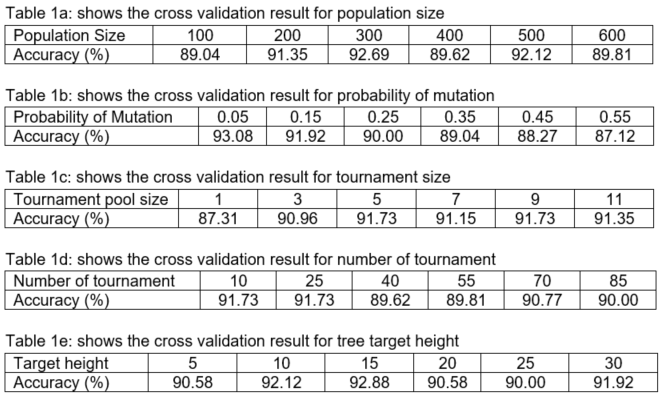

In [1]:
# for parameters tuning of evolutionary tree, do not run it as it takes awhile

''' 

accuracy_EDT_N = []
accuracy_EDT_Pm = []
accuracy_EDT_Tk = []
accuracy_EDT_Tn = []
accuracy_EDT_TH = []

j = []
for i in range (100, 700, 100):
    GADT_N = EDT(N=i)
    accuracy= k_fold_cross_validation(GADT_N, 1, kfold, X, y)*100
    accuracy_EDT_N.append(accuracy)
    j.append(i)
print(f'N of {j}: {accuracy_EDT_N}')
    
j = []
for i in np.arange (0.05, 0.6, 0.1):
    GADT_Pm = EDT(mutation_prob=i)
    accuracy= k_fold_cross_validation(GADT_Pm, 1, kfold, X, y)*100
    accuracy_EDT_Pm.append(accuracy)
    j.append(i)
print(f'Pm of {j}: {accuracy_EDT_Pm}')
    
j = []
for i in range (1, 12, 2):
    GADT_Tk = EDT(tournament_k=i)
    accuracy= k_fold_cross_validation(GADT_Tk, 1, kfold, X, y)*100
    accuracy_EDT_Tk.append(accuracy)
    j.append(i)
print(f'Tk of {j}: {accuracy_EDT_Tk}')

j = []
for i in range (10, 86, 15):
    GADT_Tn = EDT(tournament_k=i)
    accuracy= k_fold_cross_validation(GADT_Tn, 1, kfold, X, y)*100
    accuracy_EDT_Tn.append(accuracy)
    j.append(i)
print(f'Tn of {j}: {accuracy_EDT_Tn}')

j = []
for i in range (5, 31, 5):
    GADT_TH = EDT(target_height=i)
    accuracy= k_fold_cross_validation(GADT_TH, 1, kfold, X, y)*100
    accuracy_EDT_TH.append(accuracy)
    j.append(i)
print(f'TH of {j}: {accuracy_EDT_TH}')

'''

" \n\naccuracy_EDT_N = []\naccuracy_EDT_Pm = []\naccuracy_EDT_Tk = []\naccuracy_EDT_Tn = []\naccuracy_EDT_TH = []\n\nj = []\nfor i in range (100, 700, 100):\n    GADT_N = EDT(N=i)\n    accuracy= k_fold_cross_validation(GADT_N, 1, kfold, X, y)*100\n    accuracy_EDT_N.append(accuracy)\n    j.append(i)\nprint(f'N of {j}: {accuracy_EDT_N}')\n    \nj = []\nfor i in np.arange (0.05, 0.6, 0.1):\n    GADT_Pm = EDT(mutation_prob=i)\n    accuracy= k_fold_cross_validation(GADT_Pm, 1, kfold, X, y)*100\n    accuracy_EDT_Pm.append(accuracy)\n    j.append(i)\nprint(f'Pm of {j}: {accuracy_EDT_Pm}')\n    \nj = []\nfor i in range (1, 12, 2):\n    GADT_Tk = EDT(tournament_k=i)\n    accuracy= k_fold_cross_validation(GADT_Tk, 1, kfold, X, y)*100\n    accuracy_EDT_Tk.append(accuracy)\n    j.append(i)\nprint(f'Tk of {j}: {accuracy_EDT_Tk}')\n\nj = []\nfor i in range (10, 86, 15):\n    GADT_Tn = EDT(tournament_k=i)\n    accuracy= k_fold_cross_validation(GADT_Tn, 1, kfold, X, y)*100\n    accuracy_EDT_Tn.append

In [13]:
# Parameters for genetic algorithm decision tree
N = 500 # number of individuals in a population
target_height = 15 # target size of the tree
Tournament_number = 25 # number of tournament
tournament_k = 9 # tournament pool size
mutation_prob = 0.05 # probability of mutation happening

M = 1000 # maximum number of generation
stall_iter = 100 # number of iteration before concluding the algorithm  converges

maxdepth = 100 # Max tree depth in decision tree with GA
EPSILON = 0.001 # convergence tolerance

# Fitness fucntion parameters
errorfactor = 1 # the factor that controls the relative importance of model accuracy
heightfactor = 0.025 #regularisation term, it penalizes the size of an individual in terms of depth of the tree

In [14]:
class Node:
    def __init__(self):
        self.parent: Node = None
        self.attribute = None
        self.threshold = None
        self.child_yes: Node = None
        self.child_no: Node = None
        self.label = None

    def copy(self):
        new = Node()
        new.attribute = self.attribute
        new.threshold = self.threshold
        new.label = self.label

        if new.label is None:
            new.child_yes = self.child_yes.copy()
            new.child_yes.parent = new
            new.child_no = self.child_no.copy()
            new.child_no.parent = new

        return new

    def height(self) -> int:
        if self.label is not None:
            return 1
        else:
            return 1 + max(self.child_yes.height(), self.child_no.height())

    def subnodes_count(self) -> int:
        if self.label:
            return 1
        else:
            return self.child_yes.subnodes_count() + self.child_no.subnodes_count()


def get_nth_subnode(root: Node, n: int) -> Node:
    tmp: List[Node] = [root]

    for _ in range(n):
        cur = tmp.pop()
        if cur.label is None:
            tmp.append(cur.child_no)
            tmp.append(cur.child_yes)

    return cur


def generate_subtree(p_split: float, attributes: int,
                     ranges: List[Tuple[float, float]], labels: np.ndarray,
                     depth: int = 1) -> Node:
    MAX_DEPTH = maxdepth
    node = Node()

    if random() < p_split and depth < MAX_DEPTH:
        node.attribute = randrange(attributes)
        node.threshold = uniform(*ranges[node.attribute])
        node.child_yes = generate_subtree(p_split, attributes, ranges, labels,
                                          depth + 1)
        node.child_yes.parent = node
        node.child_no = generate_subtree(p_split, attributes, ranges, labels,
                                         depth + 1)
        node.child_no.parent = node
    else:
        node.label = choice(labels)

    return node

class Tree:
    def __init__(self, root: Node, value: float):
        self.root = root
        self.value = value

    def copy(self):
        return Tree(self.root.copy(), self.value)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances

class EDT(BaseEstimator, ClassifierMixin):
    """Evolutionary Decision Tree"""
    
    def __init__(
        self,
        N: int = 500,
        Tournament_number: int = 25,
        p_split: float = 0.5,
        target_height: int = 15,
        tournament_k: int = 9,
        mutation_prob: float = 0.05,
        M: int = 1000,
        stall_iter: int = 100
    ):
        self.N = N
        self.Tournament_number = Tournament_number + (Tournament_number % 2)  # make it even
        self.p_split = p_split
        self.target_height = target_height
        self.tournament_k = tournament_k
        self.mutation_prob = mutation_prob
        self.M = M
        self.stall_iter = stall_iter
        self.root: Node = None

    def get_params(self, deep = True):
        # suppose this estimator has parameters "alpha" and "recursive"
        return {"N": self.N, 
                "Tournament_number": self.Tournament_number, 
                "p_split": self.p_split, 
                "target_height": self.target_height,
                "tournament_k": self.tournament_k,
                "mutation_prob": self.mutation_prob,
                "M": self.M,
                "stall_iter": self.stall_iter}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self
    
    def eval_try(self, x: np.ndarray) -> float:
        """Returns error of prediction of x given true values y."""
        return self.eval_from_node_try(self.root, x)
            
    def eval(self, x: np.ndarray, y: np.ndarray) -> float:
        """Returns error of prediction of x given true values y."""
        return self.eval_from_node(self.root, x, y)

    def predict(self, x: np.ndarray):
        """Predicts output for input x."""
        if self.root is None:
            raise Exception('Model not trained!')
        return self.predict_from_node(self.root, x)

    def fit(self, x: np.ndarray, y: np.ndarray, verbose: bool = False) -> None:
        """Finds decision tree that tries to predict y given x."""
        attributes = len(x[0])
        ranges = []
        for i in range(attributes):
            vals = [tmp[i] for tmp in x]
            ranges.append((min(vals), max(vals)))
        labels = np.unique(y)

        P = []
        for _ in range(self.N):
            root = generate_subtree(self.p_split, attributes, ranges, labels)
            value = self.ga_fun(root, x, y)
            P.append(Tree(root, value))

        stop = False
        iter = 1
        stall_iter = 0
        current_best = P[0]
        best_val = current_best.value

        while not stop:
            try:
                R = self.select(P)
                C = self.crossover(R, x, y)
                O = self.mutation(C, x, y, attributes, ranges, labels)
                P = self.replace(P, O)

                P.sort(key=lambda tree: tree.value)
                current_best = P[0]

                if verbose:
                    self.diagnostics(iter, P)

                if abs(current_best.value - best_val) < EPSILON:
                    stall_iter += 1
                else:
                    stall_iter = 0
                    best_val = current_best.value

                if iter >= self.M or stall_iter >= self.stall_iter:
                    stop = True
                iter += 1
            except KeyboardInterrupt:
                print('User interrupted!')
                stop = True
        depths = {tmp.root.height() for tmp in P}
        self.root = current_best.root

    def diagnostics(self, iter: int, P: List[Tree]) -> None:
        vals = [tmp.value for tmp in P]
        mean = sum(vals) / len(P)
        best = min(vals)
        depths = {tmp.root.height() for tmp in P}

        print(f"[Iteration {iter:02d}] "
              f"Best fitness value: {best:.5f}, "
              f"Mean fitness: {mean:.3f}, "
              f"Depths: {sorted(depths)}")

    def verify_values(self, trees: List[Tree], x: np.ndarray, y: np.ndarray):
        result = all(
            abs(tree.value - self.ga_fun(tree.root, x, y)) < 0.01 for tree in
            trees)
        print(f'All correct: {result}')

# selection function
    def select(self, P: List[Tree]) -> List[Tree]:
        R = []

        for _ in range(self.Tournament_number):
            rank = choices(P, k=self.tournament_k)
            rank.sort(key=lambda tree: tree.value)
            R.append(rank[0].copy())
        return R

#crossover function
    def crossover(self, R: List[Tree], x: np.ndarray, y: np.ndarray) -> List[Tree]:
        R = [tree.copy() for tree in R]
        pairs = [(R[2 * i], R[2 * i + 1]) for i in range(int(len(R) / 2))]
        C = []

        for a, b in pairs:
            first = get_nth_subnode(a.root,
                                    randint(1, a.root.subnodes_count()))
            second = get_nth_subnode(b.root,
                                     randint(1, b.root.subnodes_count()))

            self.swap(a, first, b, second)

            C.append(Tree(a.root, self.ga_fun(a.root, x, y)))
            C.append(Tree(b.root, self.ga_fun(b.root, x, y)))

        return C

    def swap(self, a_tree, a_node, b_tree, b_node):
        if a_node.parent is not None and b_node.parent is not None:
            a_node.parent, b_node.parent = b_node.parent, a_node.parent

            if b_node is a_node.parent.child_yes:
                a_node.parent.child_yes = a_node
            else:
                a_node.parent.child_no = a_node

            if a_node is b_node.parent.child_yes:
                b_node.parent.child_yes = b_node
            else:
                b_node.parent.child_no = b_node
        if a_node.parent is None and b_node.parent is not None:
            a_node.parent, b_node.parent = b_node.parent, a_node.parent
            # b_node.parent == None
            if b_node is a_node.parent.child_yes:
                a_node.parent.child_yes = a_node
            else:
                a_node.parent.child_yes = a_node

            a_tree.root = b_node
        if a_node.parent is not None and b_node.parent is None:
            a_node.parent, b_node.parent = b_node.parent, a_node.parent
            # a_node.parent == None
            if a_node is b_node.parent.child_yes:
                b_node.parent.child_yes = b_node
            else:
                b_node.parent.child_no = b_node

            b_tree.root = a_node
        if a_node.parent is None and b_node.parent is None:
            a_tree.root, b_tree.root = b_node, a_node

#mutation function
    def mutation(self, C: List[Tree], x: np.ndarray, y: np.ndarray,
                 attributes: int, ranges: List[Tuple[float, float]],
                 labels: list) -> List[Tree]:
        C = [tree.copy() for tree in C]
        O = []

        for tree in C:
            tmp: List[Node] = [tree.root]
            while len(tmp) > 0:
                cur = tmp.pop()

                if random() < self.mutation_prob:
                    if cur.label is None:
                        cur.attribute = randrange(attributes)
                        cur.threshold = uniform(*ranges[cur.attribute])
                    else:
                        cur.label = choice(labels)

                if cur.label is None:
                    tmp.append(cur.child_no)
                    tmp.append(cur.child_yes)

            O.append(Tree(tree.root, self.ga_fun(tree.root, x, y)))

        return O

# recombination function for mutation
    def replace(self, P: List[Tree], O: List[Tree]) -> List[Tree]:
        union = P + O
        union.sort(key=lambda tree: tree.value)
        return union[:self.N]

    def predict_from_node(self, root: Node, x: np.ndarray):
        node = root
        while node.label is None:
            if x[node.attribute] > node.threshold:
                node = node.child_yes
            else:
                node = node.child_no

        return node.label

    
    def eval_from_node(self, root: Node, x: np.ndarray, y: np.ndarray) -> float:
        assert len(x) == len(y)
        preds = [self.predict_from_node(root, sample) for sample in x]
        errors = [pred != goal for pred, goal in zip(preds, y)]
        return sum(errors) / len(errors)
    
    def eval_from_node_try(self, root: Node, x: np.ndarray) -> float:
        preds = [self.predict_from_node(root, sample) for sample in x]
        return (preds)

# fitness function -> evaluating individual fitness score
    def ga_fun(self, root: Node, x: np.ndarray, y: np.ndarray) -> float:
        error_factor = errorfactor * self.eval_from_node(root, x, y)
        height_factor = heightfactor * root.height() / self.target_height
        return error_factor + height_factor


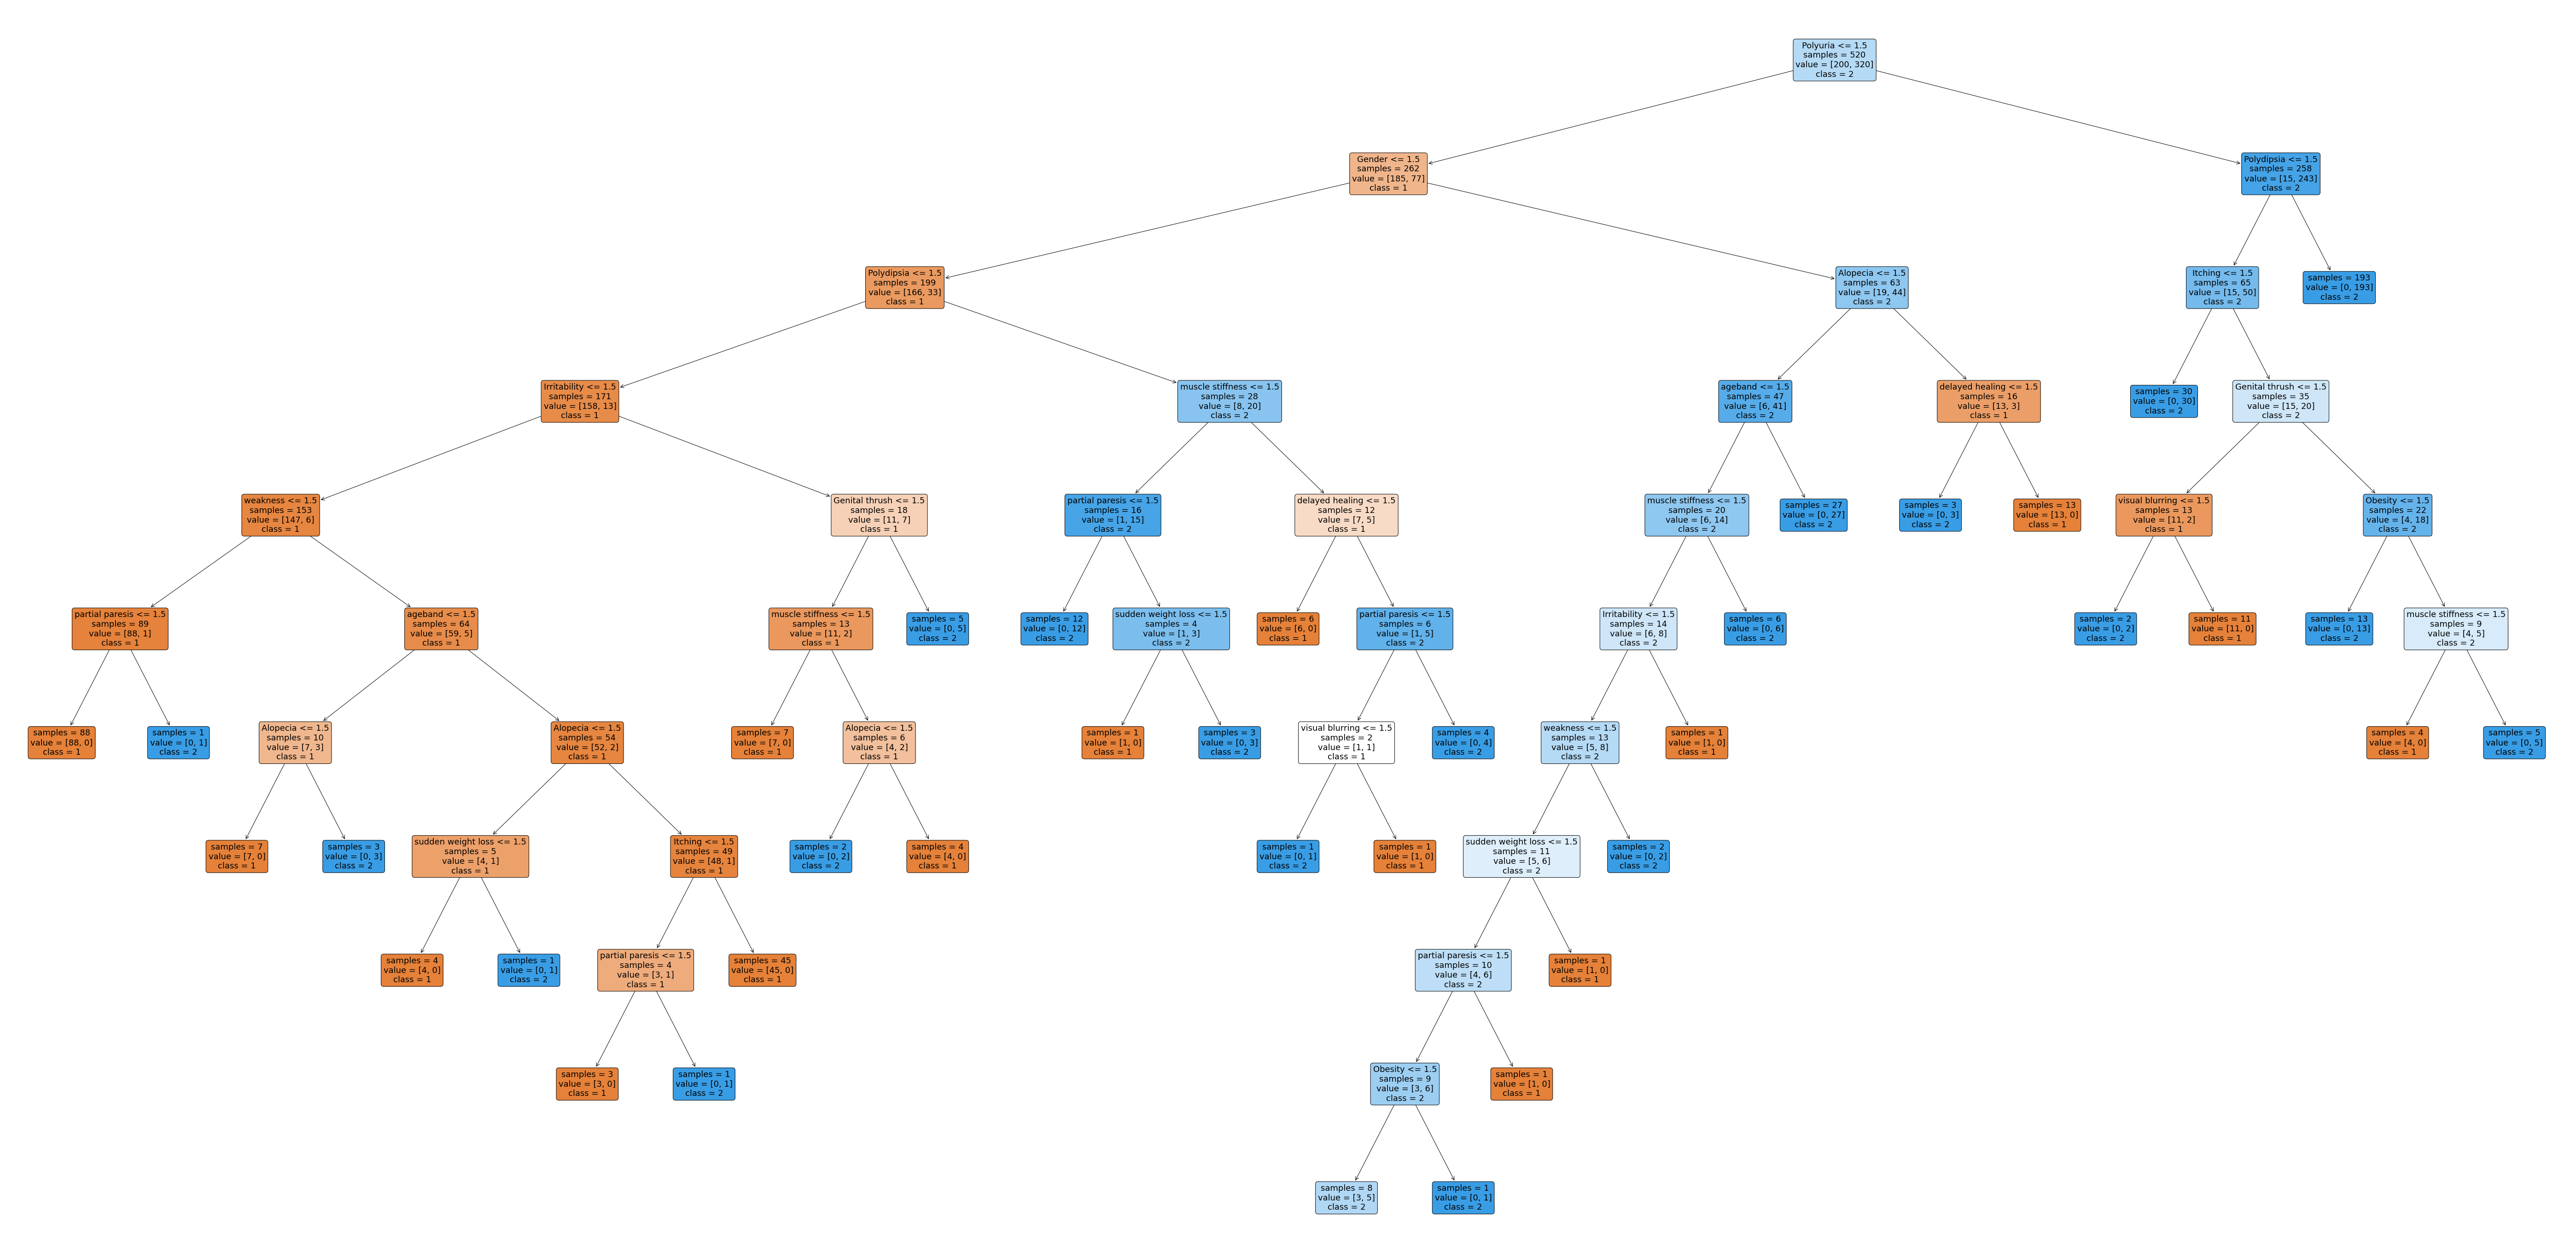

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

model_DT.fit(X,y)

plt.figure(figsize=(100,50))

a = plot_tree(model_DT, 
          max_depth=None,
          feature_names=cols[:-1],
          class_names=['1','2'],
          label='all', 
          impurity=False, 
          node_ids=False, 
          proportion=False,
          ax=None,
          fontsize=None,
          filled=True, 
          rounded=True,
          precision=1, )


In [18]:
print ('Standard Decision Tree Depth:',model_DT.tree_.max_depth)

Standard Decision Tree Depth: 10


In [27]:
print(f'number of individual: {N}')
print(f'max number of generations: {M}')
print(f'target size of tree: {target_height}')
print(f'number of tournament: {Tournament_number}')
print(f'tournament pool size: {tournament_k}')
print(f'probability of mutation: {mutation_prob}')
print(f'number of iteration before concluding the algorithm has converged: {stall_iter}')

GADT = EDT(
    p_split = 0.5,
    N = N,
    target_height = target_height,
    Tournament_number= Tournament_number,
    tournament_k = tournament_k,
    mutation_prob = mutation_prob,
    M = M,
    stall_iter = stall_iter)

accuracy_EDT = k_fold_cross_validation(GADT, 1, kfold, X, y)
print(f'Total accuracy: {100 * accuracy_EDT:.3f}%')

# saving trained model
filename = 'finalized_model_GADT.sav'
pickle.dump(GADT, open(filename, 'wb'))

number of individual: 500
max number of generations: 1000
target size of tree: 15
number of tournament: 25
tournament pool size: 9
probability of mutation: 0.05
number of iteration before concluding the algorithm has converged: 100
Total accuracy: 91.923%


In [22]:
# load the model from disk
filename = 'finalized_model_GADT.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.eval(X,y)
#print((1-result)*100)

93.65384615384616


## 3.3.2. Result Analysis

From the experiment, two observations are concluded:

1. There is little difference in terms of accuracy between standard decision tree (92.9%) and evolutionary decision tree (93.8%). However, evolutionary decision tree decsion tree is less complex (smaller tree size) as compared to standard decision tree. This will greatly improve interpretability of decision tree classifier.

2. It is noted that random forest algorithm outperform other 2 tree classfiers and it is understandable as random forest algorithm is a kind of ensemble learning technique. Note that for ensemble learning technique to perform better, each individual classifier in random forest must have an accuracy greater than 50%. In addition, the sample must be diverse enough in each individual classifier as well.

It is postulated that the dataset chosen is fairly straightforward and hence, simple decision tree classifier will be able to perform similar to evolutionary decision treeevolutionary decision tree decision tree. However, one key advantage of using evolutionary tree is its ability to extract more useful information compared to standard decision tree. This can be induced from the smaller number of tree depth in evolutionary decision tree algorithm yet achieving similar accuracy. Future work can test on difficult dataset to validate this point.

In this report, another objective is set out to achieve better performance of evolutionary tree algorithm compared to baseline evolutionary decision tree algorithm. There are two options in improving its performance listed below:

1.	Grid search hyper-parameter tuning of evolutionary tree
a.	Parameters can include selection strategy, crossover/mutation probability/population size and fitness function weightage
2.	Creating an ensemble model to improve model performance

However, in this report, grid search technique of hyper-parameters tuning will not be looked into as it requires large amount of computational time.

The ensemble model was constructed to validate above hypothesis. 5 single evolutionary trees are used together with simple majority voting to create the ensemble model, with slight differences in their hyper-parameters. The result was subsequently compared with random forest classifier (*n_estimator = 5*) and baseline evolutionary decision tree model. The result of ensemble genetic tree algorithm is shown below. In essence, ensemble learning outperform single classifier and genetic induced decision tree classifiers performance (92.9%) is improved as compared to single evolutionary decision tree classifier (91.9%) and has similar results compared to random forest classifier (93.7%).

In [29]:
# embedded genetic tree algorithm in ensemble learning technique with n estimator = 5

def k_fold_cross_validation_ensemble(n: int, k: int, X: np.ndarray,
                            y: np.ndarray) -> float:
    total_accuracy = 0.0
    
    model1 = EDT(p_split = 0.5,N = 500,target_height = 15,Tournament_number= 15,tournament_k = 7,mutation_prob = 0.05,M = 500,stall_iter = 100)
    model2 = EDT(p_split = 0.5,N = 500,target_height = 15,Tournament_number= 20,tournament_k = 8,mutation_prob = 0.07,M = 500,stall_iter = 100)
    model3 = EDT(p_split = 0.5,N = 500,target_height = 15,Tournament_number= 25,tournament_k = 9,mutation_prob = 0.1,M = 500,stall_iter = 100)
    model4 = EDT(p_split = 0.5,N = 500,target_height = 15,Tournament_number= 30,tournament_k = 10,mutation_prob = 0.12,M = 500,stall_iter = 100)
    model5 = EDT(p_split = 0.5,N = 500,target_height = 15,Tournament_number= 35,tournament_k = 11,mutation_prob = 0.15,M = 500,stall_iter = 100)
    
    for o in range(n):
        p = np.random.permutation(len(y))
        X_shuffled, y_shuffled = X[p], y[p]
        X_batches = np.array_split(X_shuffled, k)
        y_batches = np.array_split(y_shuffled, k)

        for i in range(k):
            X_test, y_test = X_batches[i], y_batches[i]
            X_train = np.vstack([batch for j, batch in enumerate(X_batches) if j != i])
            y_train = np.hstack([batch for j, batch in enumerate(y_batches) if j != i])

            model1.fit(X_train, y_train)
            model2.fit(X_train, y_train)
            model3.fit(X_train, y_train)
            model4.fit(X_train, y_train)
            model5.fit(X_train, y_train)
            
            pred1 = model1.eval_try(X_train)
            pred2 = model2.eval_try(X_train)
            pred3 = model3.eval_try(X_train)
            pred4 = model3.eval_try(X_train)
            pred5 = model3.eval_try(X_train)
            
            final_pred = np.array([])
            for i in range(0,len(X_train)):
                final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i], pred4[i], pred5[i]]))
                
            errors = [final_pred != goal for final_pred, goal in zip(final_pred, y_train)]
            error = (sum(errors) / len(errors))
            
            accuracy = 1 - error
            print (accuracy)
            total_accuracy += accuracy
            
    return total_accuracy / (n * k)


In [30]:
accuracy_GADT_ensemble = k_fold_cross_validation_ensemble(1,kfold,X,y)
print(f'Total accuracy: {100 * accuracy_GADT_ensemble:.3f}%')

0.9423076923076923
0.9086538461538461
0.9350961538461539
0.9375
0.9230769230769231
Total accuracy: 92.933%



# 4. Future Research on Method

In this section of the report, future research on current challenges genetic algorithm and application of genetic algorithm will be discussed. 


## 4.1 Future Research

Despite having significant advantages, genetic algorithm does come with its’ drawbacks. Some of the challenges are premature convergence, degree of crossover/mutation of individuals and high computational time required for large population size.

Premature convergence results in sub optimal solution and to avoid this issue, some researchers suggested that the diversity should be used. However, current genetic algorithm has already included crossover and mutation operators to increase diversity, it may requires something different to boost diversity and minimise premature convergence 

Proper balancing between crossover operators and mutation operators need to be thoroughly reviewed as the probabilistic nature of genetic algorithm cannot determine the exact degree of crossover and mutation operators for an effective and optimal solution.

As such, the performance of a model obtained using genetic algorithm can be made better by overcoming the current shortfall. Some possible future research area for genetic algorithm can include the following:

- Tackling premature convergence by modifying and/or designing new crossover and mutation techniques to minimise local optimal solution
- Techniques to choose the appropriate degree of crossover and mutation operators to minimise local optimal solution.

## 4.2 Future Application

Deep learning has revolutionalise the entire field of computer vision and natural language processing (NLP), it requires data scientist to handcraft and architect out neural network layers to improve model performance. State of the art neural networks usually have many layers and require some domain knowledge to design out a performing model. As such, potential future application of genetic algorithm can be employed in deep learning, to optimise search space for best neural network design and optimum layers, possibly improving performance of model with fewer layers. 


# 5. Conclusion

In this report, two objectives are set out to evaluate evolutionary decision tree with genetic algorithm against standard decision tree classifier. Proposed approach has similar accuracy compared to standard decision trees classifier. However, its tree size is smaller, suggesting its ability to extract more useful information compared to standard decision tree classifier. Again, in the ensemble learning model for evolutionary tree, it has similar performance compared to random forest. In addition, ensemble model of evolutionary tree is able to improve the accuracy as compared to single evolutionary tree classifier, this could prove useful for a tougher dataset with greater number of features.

It is to note that model parameters of evolutionary tree was not tuned optimally due to high computational requirement and for the stochastic nature of genetic algorithm, it takes longer time to train compared to standard decision tree. However, the classification process takes identical time for both evolutionary and standard tree. In conclusion, genetic induced decision tree classifier proves to be able to rival, if not surpassed the performance of standard decision tree classifier. In addition, it eliminates the need of pre and/or post pruning of decision tree.



### References

[1] D. Jankowski et al., Evolutionary Algorithm for Decision Tree Induction, 2016  

[2] S. Cha, Constructing Binary Decision Trees using Genetic Algorithms, 2008  

[3] R. Barros et al., A Survey of Evolutionary Algorithms for Decision Tree Induction, 2011  

[4] S. Poonam et al., Analysis of Selection Schemes for Solving an Optimization Problem in Genetic Algorithm, 2014

[5] Y. Xuesong et al., An Improved Genetic Algorithm and Its Application, 2012